### CREDIT CARD FRAUD DETECTION

In [33]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, 
    precision_recall_curve)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

In [34]:
# Load dataset
train = pd.read_csv(r"C:\Users\srira\Downloads\Brainwave Matrix Internship\Datasets\fraudTest.csv")
test = pd.read_csv(r"C:\Users\srira\Downloads\Brainwave Matrix Internship\Datasets\fraudTest.csv")

In [35]:
# Display Dataset Shape
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (555719, 23)
Test shape: (555719, 23)


In [36]:
# Merge train and test for consistency
total = pd.concat([train, test], axis=0).reset_index(drop=True)

In [37]:
# Data Cleaning
train.drop("Unnamed: 0", axis=1, inplace=True)
test.drop("Unnamed: 0", axis=1, inplace=True)

In [38]:
# Filtering only numerical columns
numerical_data = total.select_dtypes(include=['float64', 'int64'])

In [39]:
# Convert Date Columns
for df in [train, test]:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'].dt.strftime('%Y-%m-%d'))
    df['dob'] = pd.to_datetime(df['dob'])

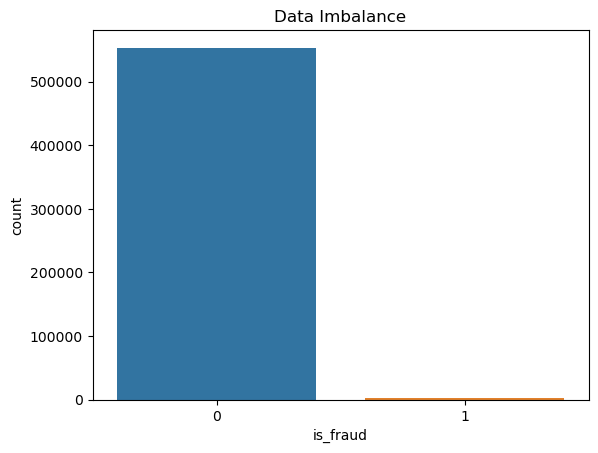

In [40]:
# Visualize Data Imbalance
sns.countplot(x="is_fraud", data=train)
plt.title("Data Imbalance")
plt.show()

In [41]:
# Combine Train and Test Data for EDA
total = pd.concat([train, test], ignore_index=True)

C:\Users\srira\AppData\Local\Temp\ipykernel_23432\2565418417.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\AppData\Local\Temp\ipykernel_23432\2565418417.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 1][feature], label='Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

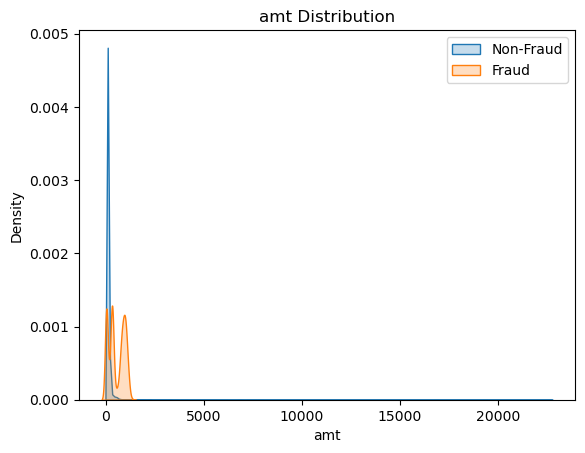

C:\Users\srira\AppData\Local\Temp\ipykernel_23432\2565418417.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\AppData\Local\Temp\ipykernel_23432\2565418417.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 1][feature], label='Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

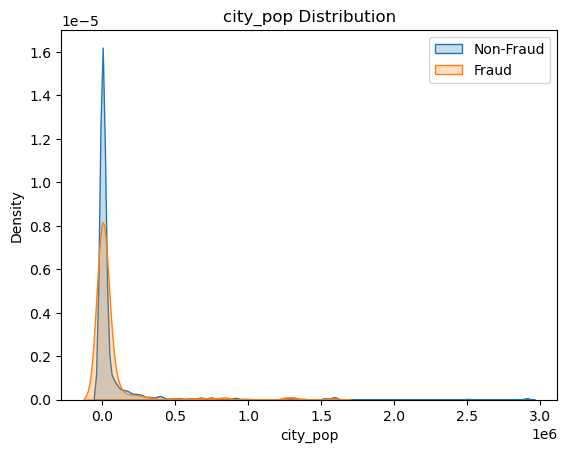

In [60]:
# Fraud vs. Non-Fraud Feature Distributions
features_to_plot = ['amt', 'city_pop']
for feature in features_to_plot:
    sns.kdeplot(total[total['is_fraud'] == 0][feature], label='Non-Fraud', shade=True)
    sns.kdeplot(total[total['is_fraud'] == 1][feature], label='Fraud', shade=True)
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

In [43]:
# Feature Engineering
total['age'] = (total['trans_date'] - total['dob']).dt.days // 365
total['latitudinal_distance'] = abs(total['merch_lat'] - total['lat'])
total['longitudinal_distance'] = abs(total['merch_long'] - total['long'])
total.drop(columns=['cc_num', 'merchant', 'first', 'last', 'street', 'zip', 'trans_num', 'unix_time',
                    'trans_date_trans_time', 'city', 'state', 'job', 'dob', 'trans_date', 'merch_lat', 'merch_long'], inplace=True)

C:\Users\srira\AppData\Local\Temp\ipykernel_23432\656776181.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\AppData\Local\Temp\ipykernel_23432\656776181.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 1][feature], label='Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

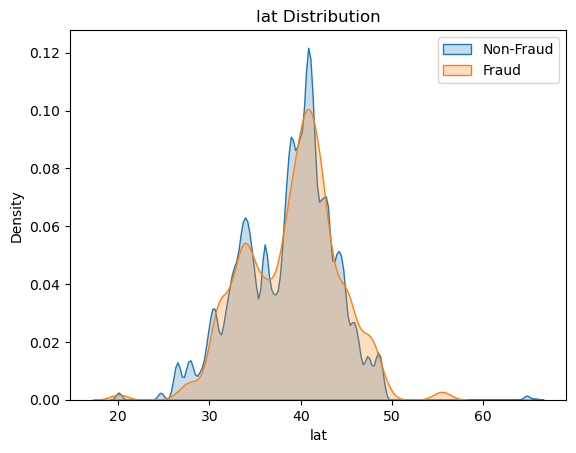

C:\Users\srira\AppData\Local\Temp\ipykernel_23432\656776181.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 0][feature], label='Non-Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\AppData\Local\Temp\ipykernel_23432\656776181.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(total[total['is_fraud'] == 1][feature], label='Fraud', shade=True)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and w

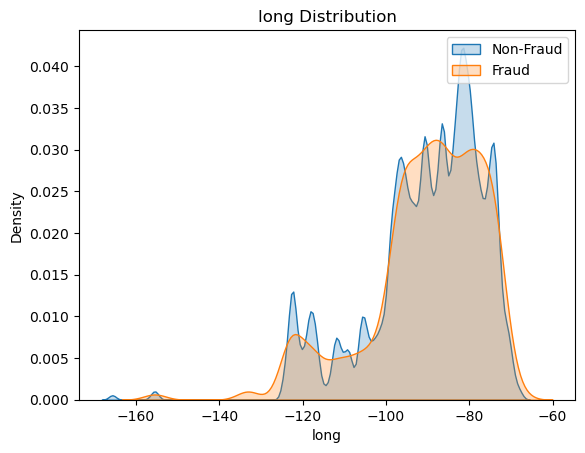

In [61]:
# Fraud vs. Non-Fraud Feature Distributions
features_to_plot = ['lat', 'long']
for feature in features_to_plot:
    sns.kdeplot(total[total['is_fraud'] == 0][feature], label='Non-Fraud', shade=True)
    sns.kdeplot(total[total['is_fraud'] == 1][feature], label='Fraud', shade=True)
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.show()

In [63]:
# Separate features and target
X = total.drop("is_fraud", axis=1)
y = total["is_fraud"]

In [64]:
# Encode non-numeric columns
non_numeric_columns = X.select_dtypes(include=['object', 'category']).columns
for col in non_numeric_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [65]:
# Check for missing values and handle them
X.fillna(X.mean(), inplace=True)

In [66]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [67]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [68]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Logistic Regression Model
log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [70]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

Logistic Regression Performance:
Accuracy: 0.9124281750864458
Precision: 0.9556938898891184
Recall: 0.865173708948424
F1 Score: 0.9081837997035895
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92    331750
           1       0.96      0.87      0.91    332539

    accuracy                           0.91    664289
   macro avg       0.92      0.91      0.91    664289
weighted avg       0.92      0.91      0.91    664289



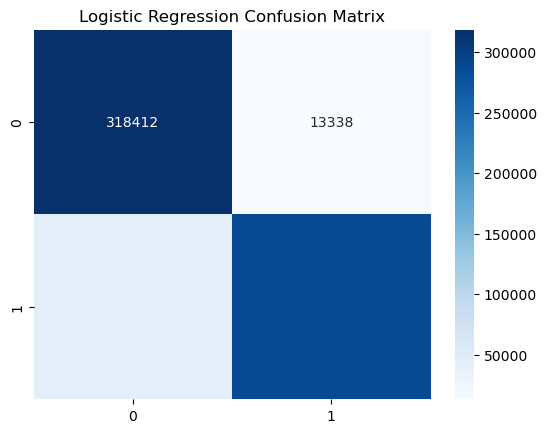

In [71]:
# Model Performance Metrics
# Logistic Regression Performance
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
evaluate_model(y_test, y_pred_log, "Logistic Regression")

Decision Tree Performance:
Accuracy: 0.9994957014191113
Precision: 0.9993026080055791
Recall: 0.9996902618940936
F1 Score: 0.9994963973620242
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    331750
           1       1.00      1.00      1.00    332539

    accuracy                           1.00    664289
   macro avg       1.00      1.00      1.00    664289
weighted avg       1.00      1.00      1.00    664289



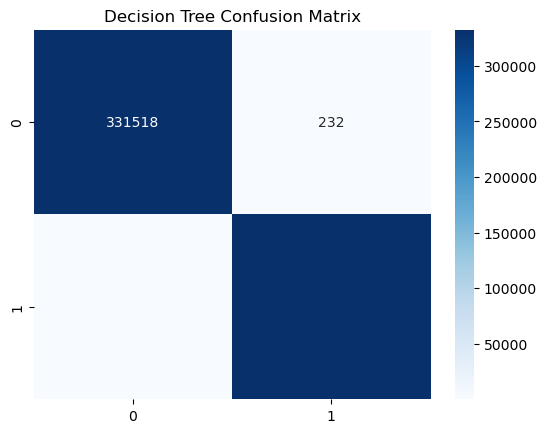

In [73]:
# Decision Tree Performance
evaluate_model(y_test, y_pred_dt, "Decision Tree")

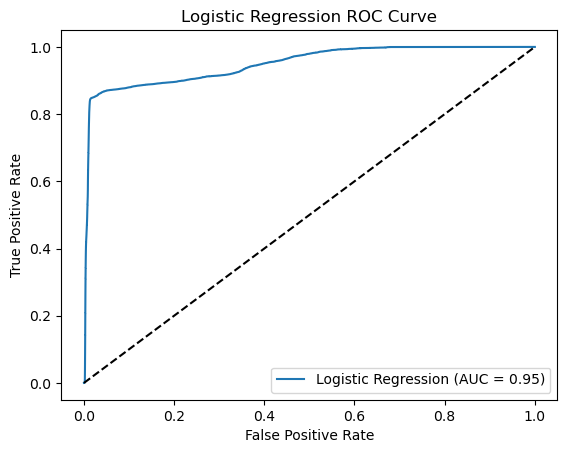

In [74]:
# ROC-AUC Curve
# Logistic Regression Curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
plot_roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")

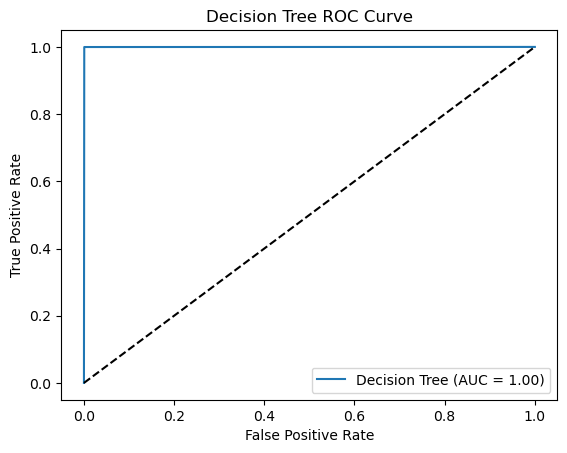

In [75]:
# Decision Tree Curve
plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1], "Decision Tree")

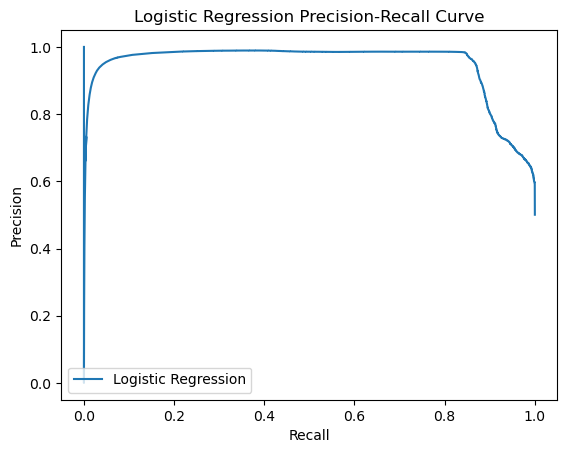

In [76]:
# Precision-Recall Curve
# Logistic Regression
def plot_precision_recall_curve(y_true, y_pred_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.figure()
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()
plot_precision_recall_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1], "Logistic Regression")

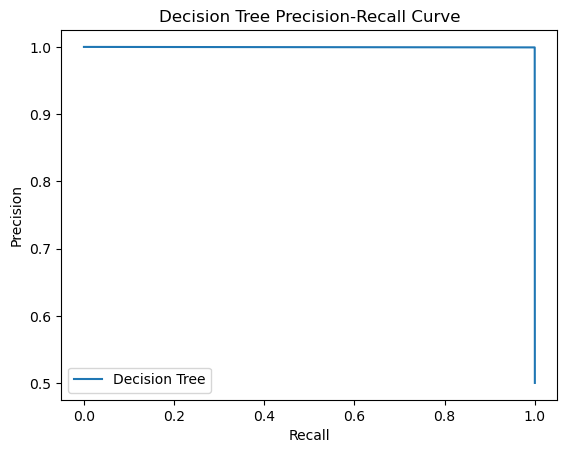

In [77]:
# Decision Tree Curve
plot_precision_recall_curve(y_test, dt_model.predict_proba(X_test)[:, 1], "Decision Tree")

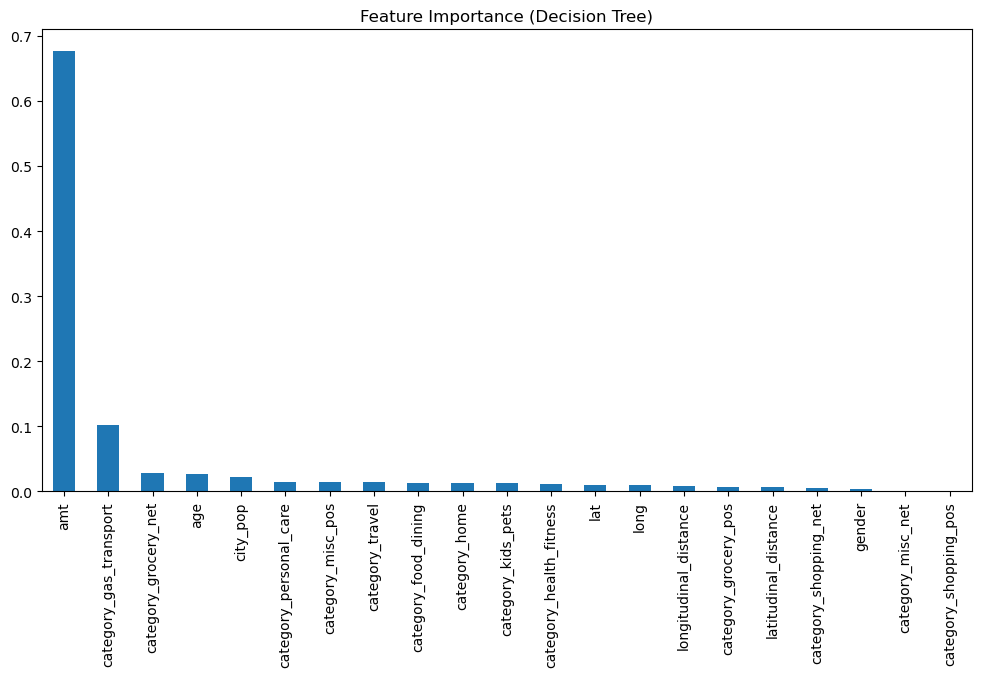

In [78]:
# Feature Importance for Decision Tree
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(12, 6))
plt.title("Feature Importance (Decision Tree)")
plt.show()

In [80]:
# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)
anomalies = iso_forest.predict(X_test)
print("Anomaly Detection Completed.")

Anomaly Detection Completed.
